In [72]:
# 패션 MNIST - 훈련세트, 테스트세트
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [73]:
# 모델 생성 함수 - 층 추가 가능하도록
def model_fn(a_layer = None): # 기본값 None
    model = keras.Sequential() # 객체 생성
    model.add(keras.layers.Input(shape=(28,28))) # 입력층
    model.add(keras.layers.Flatten()) # 플랫층 - 2차원을 1차원으로 펼쳐주는 기능
    model.add(keras.layers.Dense(100, activation='relu')) # 은닉층(밀집층) - 특성 100개, 렐루함수 사용
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax')) # 출력층 - 소프트맥스 함수 사용 

    return model

In [74]:
# model = model_fn()
# 드롭아웃 사용 
model = model_fn(keras.layers.Dropout(0.3)) # 밀집층 중 30% 비율의 출력을 0으로 랜덤하게 변경 
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# 데이터 전처리
train_scaled = train_input / 255
test_scaled = test_input / 255

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=20, validation_data=(test_scaled, test_target)) # history 객체 - 정확도, 손실률에 대한 각 에포크별 측정 데이터 (마지막 반환값)

# 13 에포크 이후 과대 적합 - 13 에포크가 최적 지점 -> 드롭아웃을 통해 알게된 사실!
history = model.fit(train_scaled, train_target, epochs=13, validation_data=(test_scaled, test_target))

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7425 - loss: 0.7369 - val_accuracy: 0.8295 - val_loss: 0.4613
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8423 - loss: 0.4371 - val_accuracy: 0.8482 - val_loss: 0.4031
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8539 - loss: 0.3979 - val_accuracy: 0.8604 - val_loss: 0.3833
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8620 - loss: 0.3774 - val_accuracy: 0.8642 - val_loss: 0.3791
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8670 - loss: 0.3573 - val_accuracy: 0.8683 - val_loss: 0.3648
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8724 - loss: 0.3460 - val_accuracy: 0.8695 - val_loss: 0.3603
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8770 - loss: 0.3341 - val_accuracy: 0.8758 - val_loss: 0.3529
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3291 - 

In [76]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


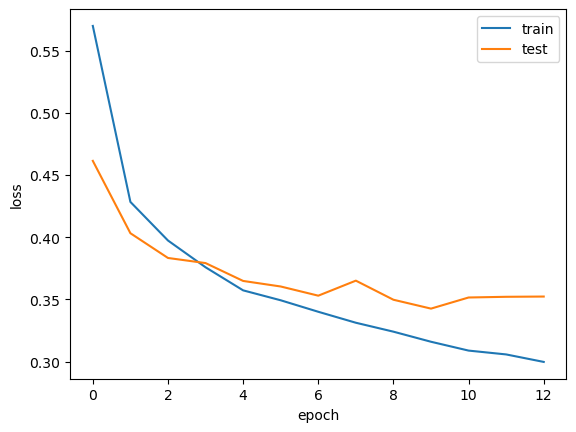

In [77]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 학습 세트 손실률
plt.plot(history.history['val_loss']) # 테스트 세트 손실률
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

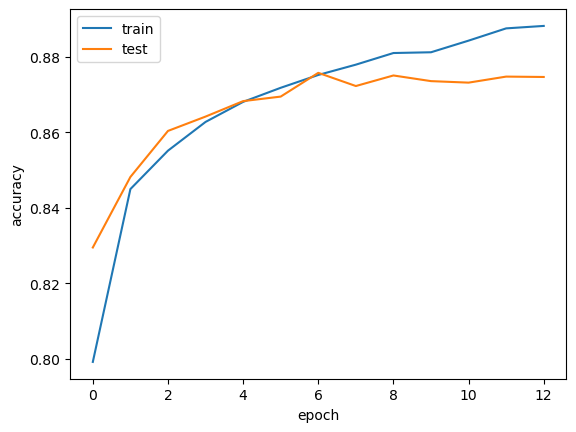

In [78]:
plt.plot(history.history['accuracy']) # 학습 세트 정확도
plt.plot(history.history['val_accuracy']) # 테스트 세트 정확도
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [79]:
# 1. 가중치만 저장
# model.save_weights("model.weights.h5") # h5 - HDFS 형식 (가중치만 저장, 저장해준 모델과 동일한 구성 후 로드)

In [80]:
# model = model_fn(keras.layers.Dropout(0.3))

In [81]:
# model.load_weights("model.weights.h5") # 앞서 학습한 13에포크 가중치를 로드 

In [82]:
# predictions = model.predict(test_scaled)

In [83]:
import numpy as np
# np.mean(test_target == predictions.argmax(axis=1)) # 정답 1, 오답 0

In [84]:
# 2. 모델 전체 저장 
model.save("model-whole.keras")

In [85]:
# 저장된 모델 로드
model = keras.models.load_model("model-whole.keras")

In [87]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8759 - loss: 0.3442


[0.35224008560180664, 0.8747000098228455]